In [4]:
import torch
from torch import autograd as agd
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, utils
import torchvision
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import PIL
import scipy as sp

In [6]:
#some global paraeters
in_dim = 2
nn_dim = 512 #const. throughout
batchSz = 400

In [3]:
class GaussNet(nn.Module):
    
    def __init__(self):
        super(GaussNet, self).__init__()
        self.L1 = nn.Linear(in_dim, nn_dim)
        self.L2 = nn.Linear(nn_dim, nn_dim)
        self.Ou = nn.Linear(nn_dim, 1)
    def forward(self, x):
        x = F.relu(self.L1(x))
        x = F.relu(self.L2(x))
        x = F.relu(self.Ou(x))
        return x
    def name(self):
        return 'GaussNet'

In [5]:
#for dataset creation
class GMMsampler:
    
    def __init__( self, n_samples, n_components=1, weights=[1], mu=[np.array([0,0])], sig=[np.array([[1,0],[0,1]])]):
        self.n_components = n_components
        self.n_samples = n_samples
        self.weights = weights
        self.mu = mu
        self.sig = sig
        self.dim = mu[0].size
        self.data = np.empty([n_samples, self.dim])
        self.datacid = dict()
        
    def check_musig(self):
        shmu = self.mu[0].shape
        shsig = self.sig[0].shape
        if(not(all(m.shape==shmu for m in mu))):
            print('all mean vectors must be of same dimension')
        if(not(all(s.shape==shmu for s in sig))):
            print('all covariance matrix must be of same dimension')
    
    def gen_sample(self):
        for i in range(self.n_components):
            self.datacid[i] = []
        for i in range(self.n_samples):
            idx = np.random.choice(np.arange(0,self.n_components), p=(self.weights)/np.sum(self.weights))
            mu_,sig_ = self.mu[idx], self.sig[idx]
            self.data[i,:] = np.random.multivariate_normal(mu_, sig_)
            self.datacid[idx].append(self.data[i,:])
        for idx in range(self.n_components):
            self.datacid[idx] = np.array(self.datacid[idx]).reshape(-1,2)

m1 = np.array([-1, 0])
m2 = np.array([1, 0])
m3 = np.array([0, 1])
m4 = np.array([0, -1])
m5 = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
m6 = np.array([1/np.sqrt(2), -1/np.sqrt(2)])
m7 = np.array([-1/np.sqrt(2), 1/np.sqrt(2)])
m8 = np.array([-1/np.sqrt(2), -1/np.sqrt(2)])

sig1 = np.eye(2)*0.1414
sig2 = np.eye(2)*0.1414
sig3 = np.eye(2)*0.1414
sig4 = np.eye(2)*0.1414
sig5 = np.eye(2)*0.1414
sig6 = np.eye(2)*0.1414
sig7 = np.eye(2)*0.1414
sig8 = np.eye(2)*0.1414

In [7]:
#training data generator
def traindata_gen():
    g = GMMsampler(batchSz, n_components=8, weights=[1, 1, 1, 1, 1, 1, 1, 1],
                  mu=[m1,m2,m3,m4,m5,m6,m7,m8], sig=[sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8])
    while(True):
        g.gen_sample()
        yield g.data

In [14]:
d = traindata_gen()

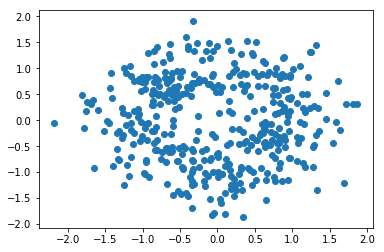

In [57]:
d_ = next(d)
plt.scatter(d_[:,0], d_[:,1])
plt.show()